#### EDA on the NIH dataset

Missing values per column:
 Image Index                    0
Finding Labels                 0
Follow-up #                    0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImage[Width            0
Height]                        0
OriginalImagePixelSpacing[x    0
y]                             0
dtype: int64
Number of duplicate rows: 0
Data summary:
          Follow-up #     Patient ID    Patient Age  OriginalImage[Width  \
count  112120.000000  112120.000000  112120.000000        112120.000000   
mean        8.573751   14346.381743      46.626365          2646.078844   
std        15.406320    8403.876972      16.602680           341.246429   
min         0.000000       1.000000       0.000000          1143.000000   
25%         0.000000    7310.750000      34.000000          2500.000000   
50%         3.000000   13993.000000      49.000000          2518.000000   
75%        10.000000   20673

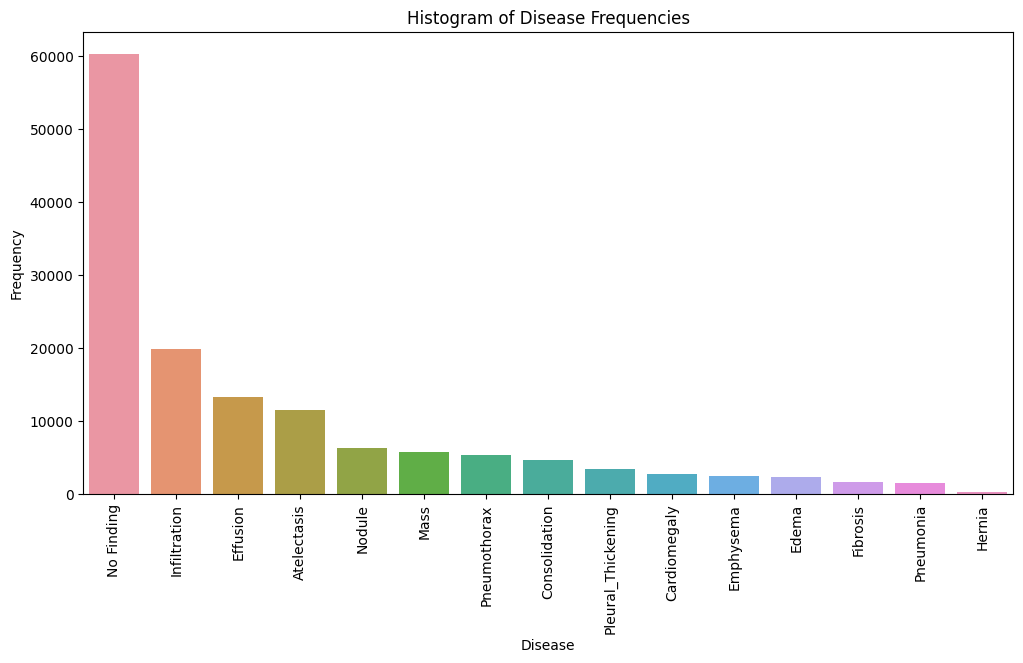

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Data_Entry_2017_v2020.csv')

missing_values = data.isna().sum()
print("Missing values per column:\n", missing_values)

duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

data_summary = data.describe()
print("Data summary:\n", data_summary)


# Split and count the disease labels
labels = data['Finding Labels'].str.split('|').explode().value_counts()

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.barplot(x=labels.index, y=labels.values)
plt.xticks(rotation=90)
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.title('Histogram of Disease Frequencies')
plt.savefig('disease_histogram.png')
plt.show()

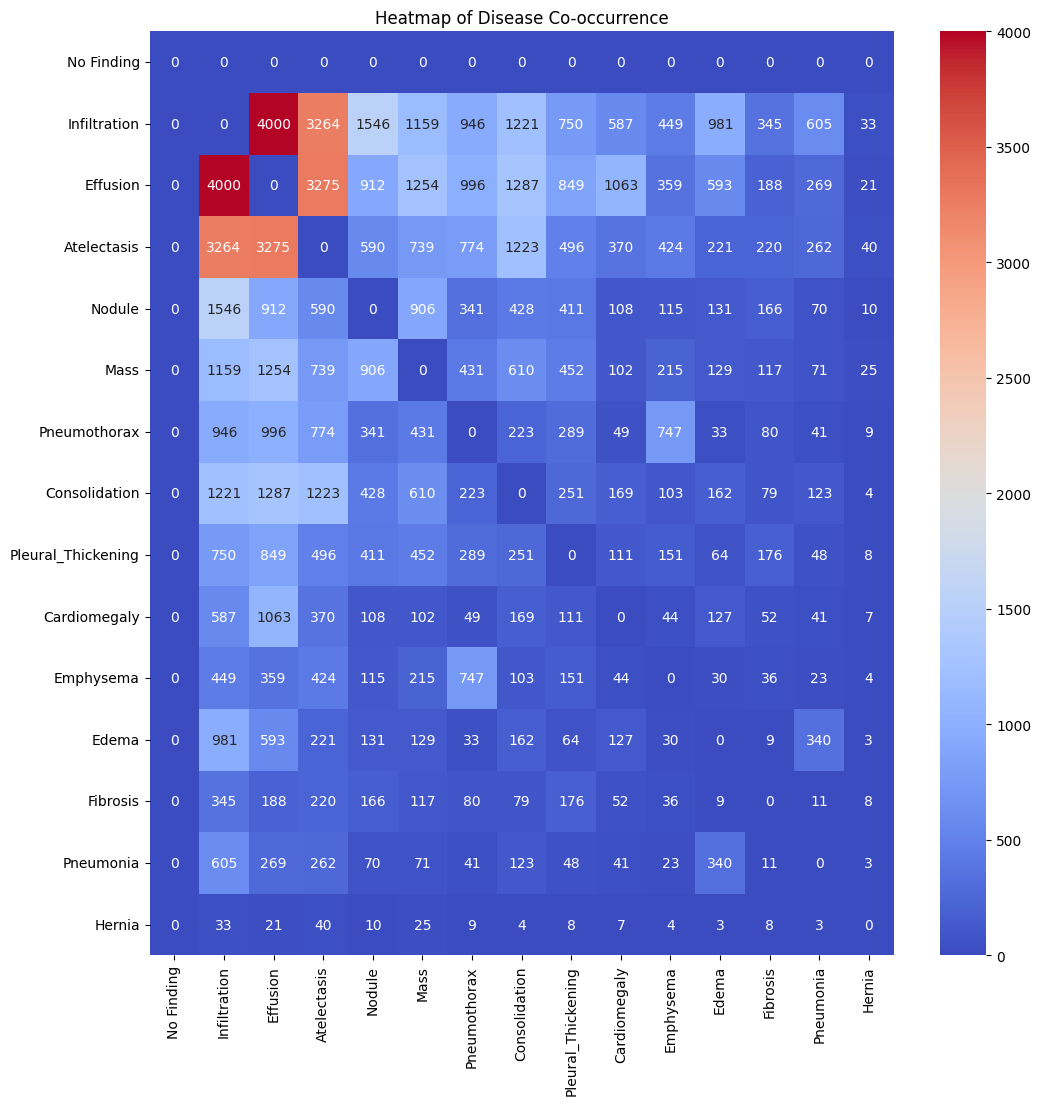

In [2]:
import itertools

# Create a co-occurrence matrix
co_occurrence = pd.DataFrame(index=labels.index, columns=labels.index, data=0)

# Count co-occurrences
for _, row in data.iterrows():
    diseases = row['Finding Labels'].split('|')
    for d1, d2 in itertools.combinations(diseases, 2):
        co_occurrence.loc[d1, d2] += 1
        co_occurrence.loc[d2, d1] += 1

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(co_occurrence, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Disease Co-occurrence')
plt.savefig('disease_heatmap.png', bbox_inches='tight')
plt.show()



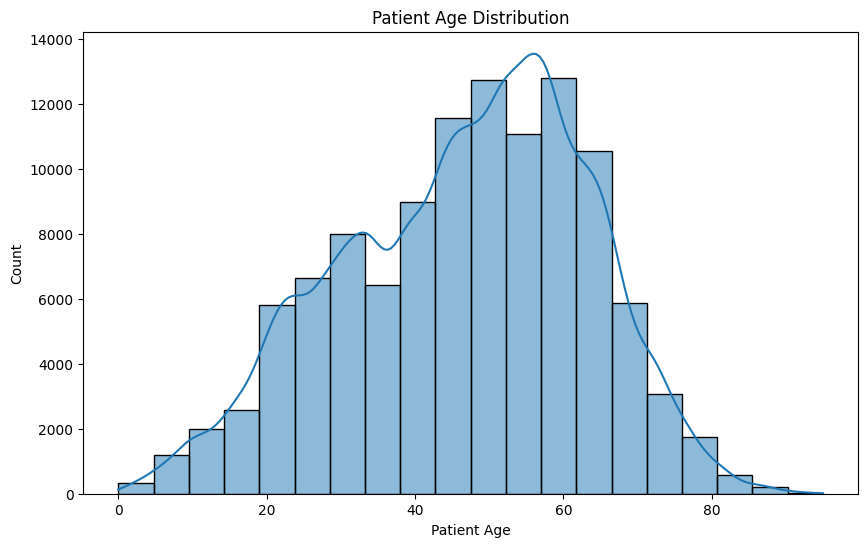

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Patient Age', kde=True, bins=20)
plt.title('Patient Age Distribution')
plt.savefig('patient_age_distribution.png', bbox_inches='tight')
plt.show()


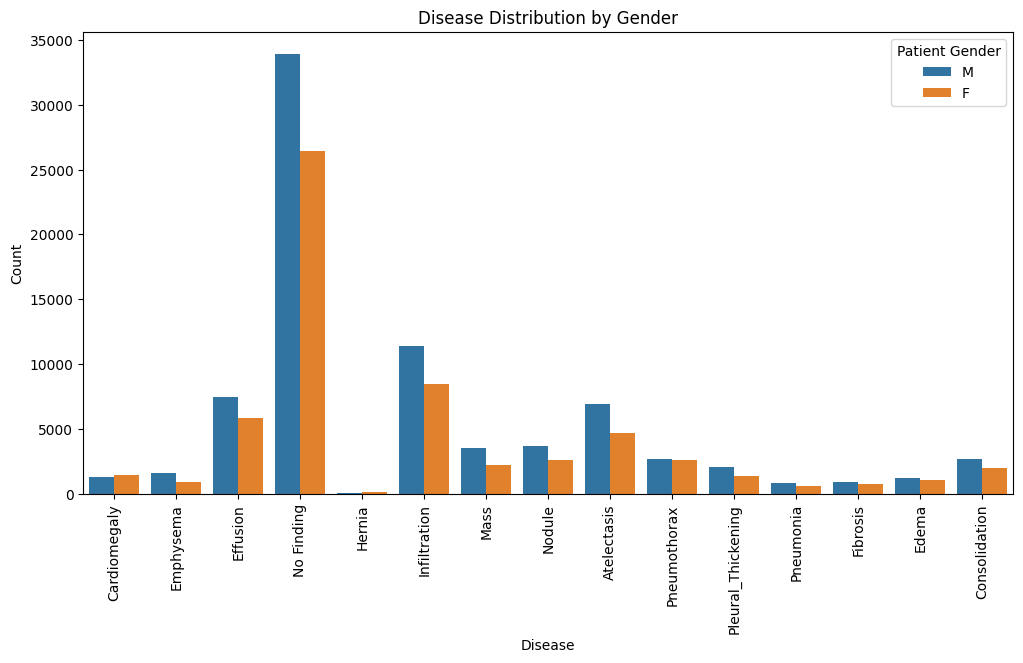

In [4]:
gender_disease = data.copy()
gender_disease['Finding Labels'] = gender_disease['Finding Labels'].str.split('|')
gender_disease = gender_disease.explode('Finding Labels')

plt.figure(figsize=(12, 6))
sns.countplot(data=gender_disease, x='Finding Labels', hue='Patient Gender')
plt.xticks(rotation=90)
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Disease Distribution by Gender')
plt.savefig('disease_distribution_gender.png', bbox_inches='tight')
plt.show()


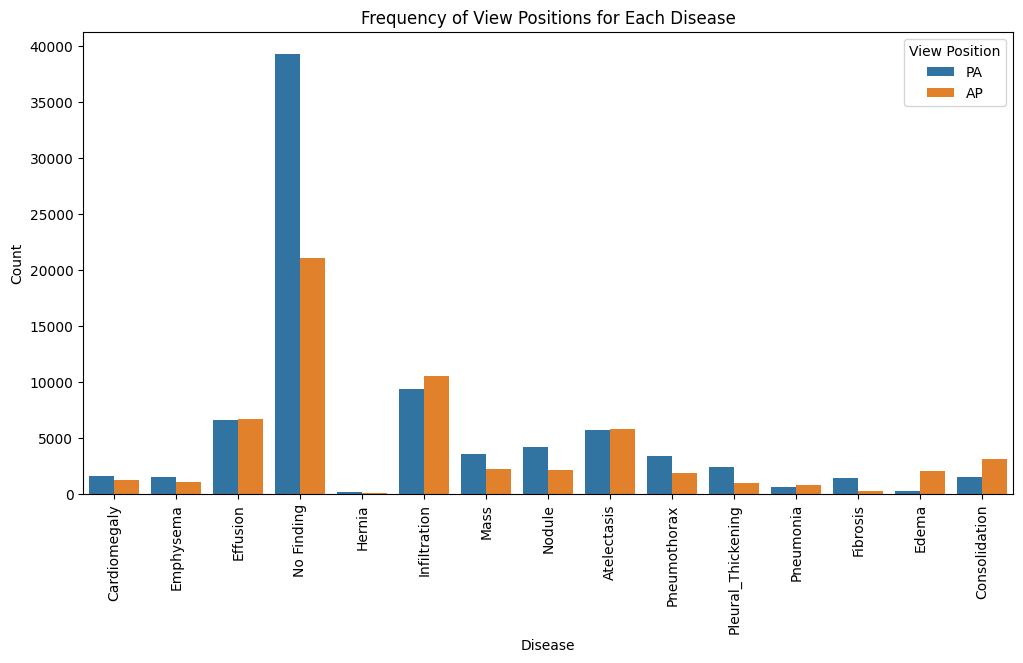

In [5]:
view_position_disease = data.copy()
view_position_disease['Finding Labels'] = view_position_disease['Finding Labels'].str.split('|')
view_position_disease = view_position_disease.explode('Finding Labels')

plt.figure(figsize=(12, 6))
sns.countplot(data=view_position_disease, x='Finding Labels', hue='View Position')
plt.xticks(rotation=90)
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Frequency of View Positions for Each Disease')
plt.show()


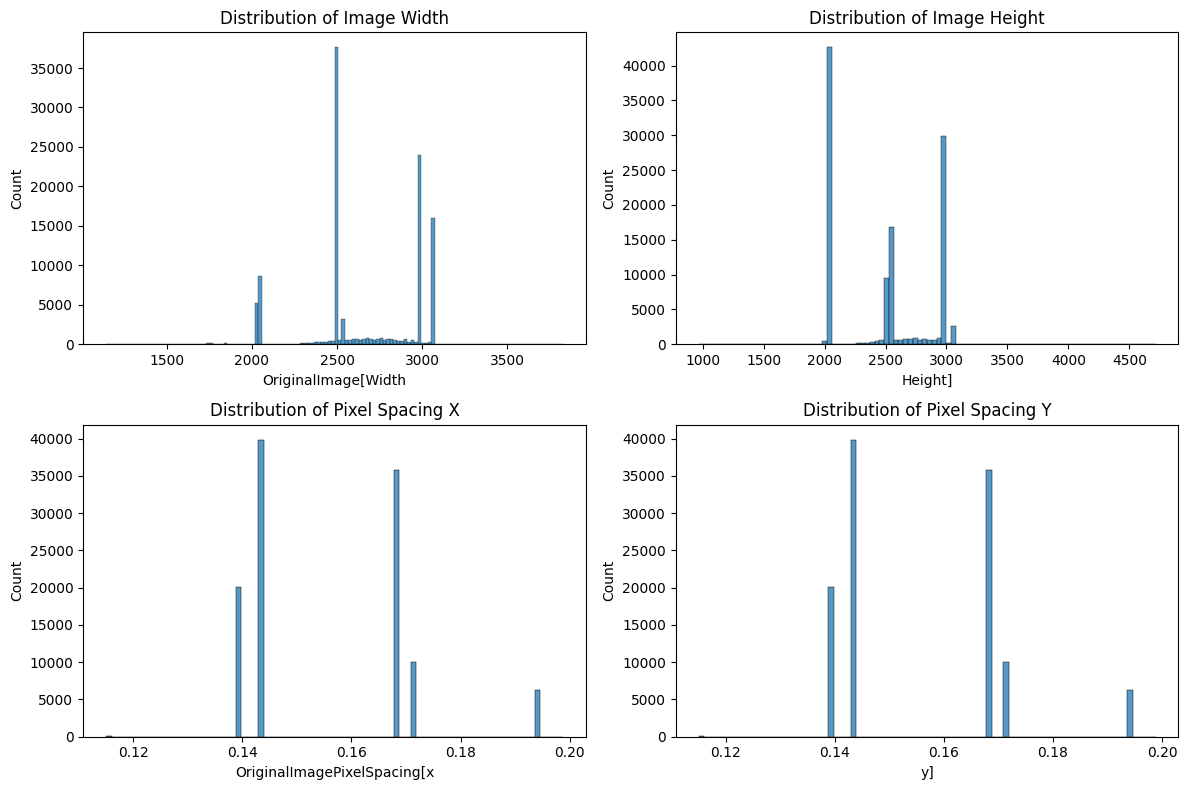

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data=data, x='OriginalImage[Width', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Image Width')
sns.histplot(data=data, x='Height]', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Image Height')
sns.histplot(data=data, x='OriginalImagePixelSpacing[x', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Pixel Spacing X')
sns.histplot(data=data, x='y]', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Pixel Spacing Y')
plt.tight_layout()
plt.savefig('distribution_of_image.png', bbox_inches='tight')
plt.show()


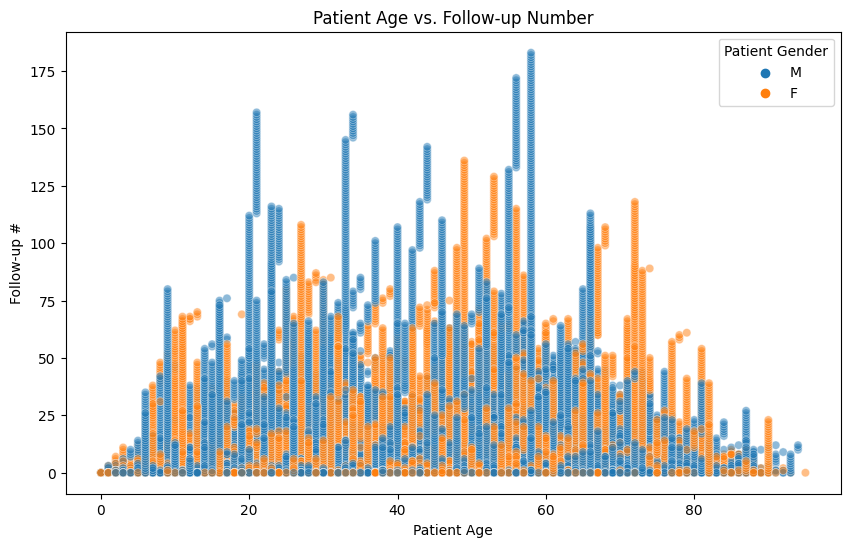

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Patient Age', y='Follow-up #', hue='Patient Gender', alpha=0.5)
plt.title('Patient Age vs. Follow-up Number')
plt.savefig('follow_up_gender.png', bbox_inches='tight')
plt.show()


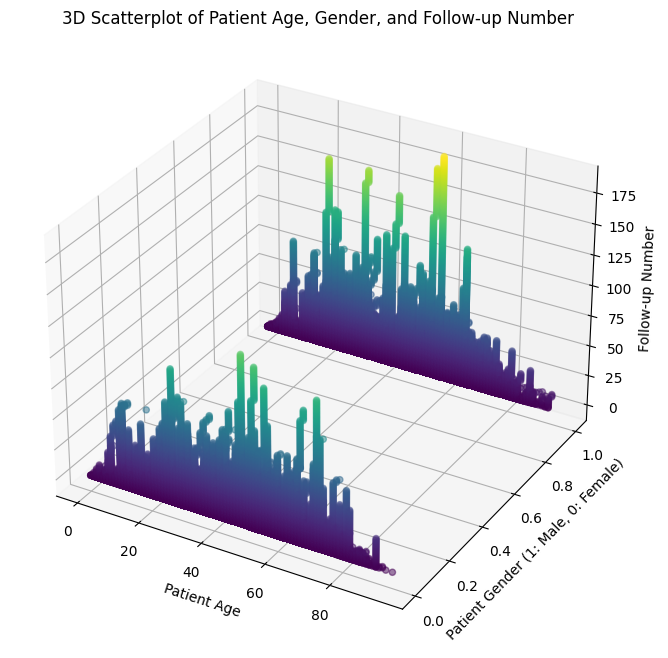

In [8]:
from mpl_toolkits.mplot3d import Axes3D

data['Patient Gender'] = data['Patient Gender'].map({'M': 1, 'F': 0})

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Patient Age'], data['Patient Gender'], data['Follow-up #'],
                     c=data['Follow-up #'], cmap='viridis', alpha=0.5)

ax.set_xlabel('Patient Age')
ax.set_ylabel('Patient Gender (1: Male, 0: Female)')
ax.set_zlabel('Follow-up Number')
ax.set_title('3D Scatterplot of Patient Age, Gender, and Follow-up Number')
plt.show()


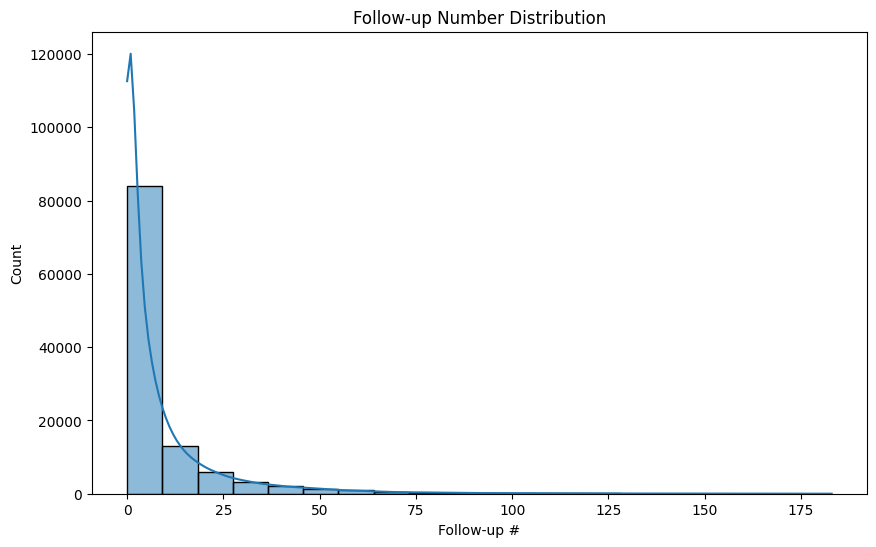

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Follow-up #', kde=True, bins=20)
plt.title('Follow-up Number Distribution')
plt.show()


In [10]:
import pandas as pd

bbox_data = pd.read_csv('BBox_List_2017.csv')

label_counts = bbox_data['Finding Label'].value_counts()

print(label_counts)


Atelectasis     180
Effusion        153
Cardiomegaly    146
Infiltrate      123
Pneumonia       120
Pneumothorax     98
Mass             85
Nodule           79
Name: Finding Label, dtype: int64


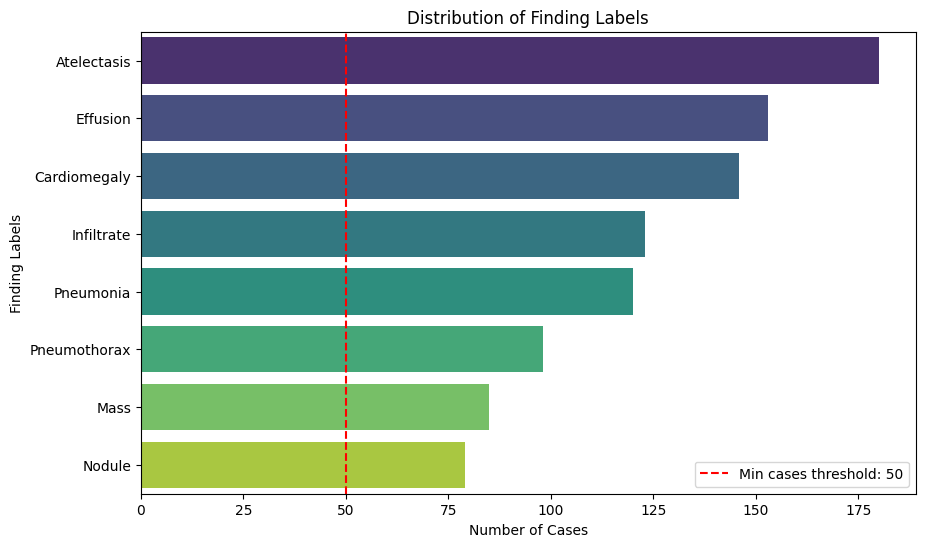

Diseases with insufficient cases for training:
Series([], Name: Finding Label, dtype: int64)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a threshold for the minimum number of cases you consider sufficient for training
min_cases_threshold = 50

plt.figure(figsize=(10, 6))
sns.barplot(y=label_counts.index, x=label_counts.values, orient='h', palette='viridis')
plt.axvline(x=min_cases_threshold, color='r', linestyle='--', label=f'Min cases threshold: {min_cases_threshold}')
plt.xlabel('Number of Cases')
plt.ylabel('Finding Labels')
plt.title('Distribution of Finding Labels')
plt.legend()
plt.show()

insufficient_cases = label_counts[label_counts < min_cases_threshold]
print("Diseases with insufficient cases for training:")
print(insufficient_cases)


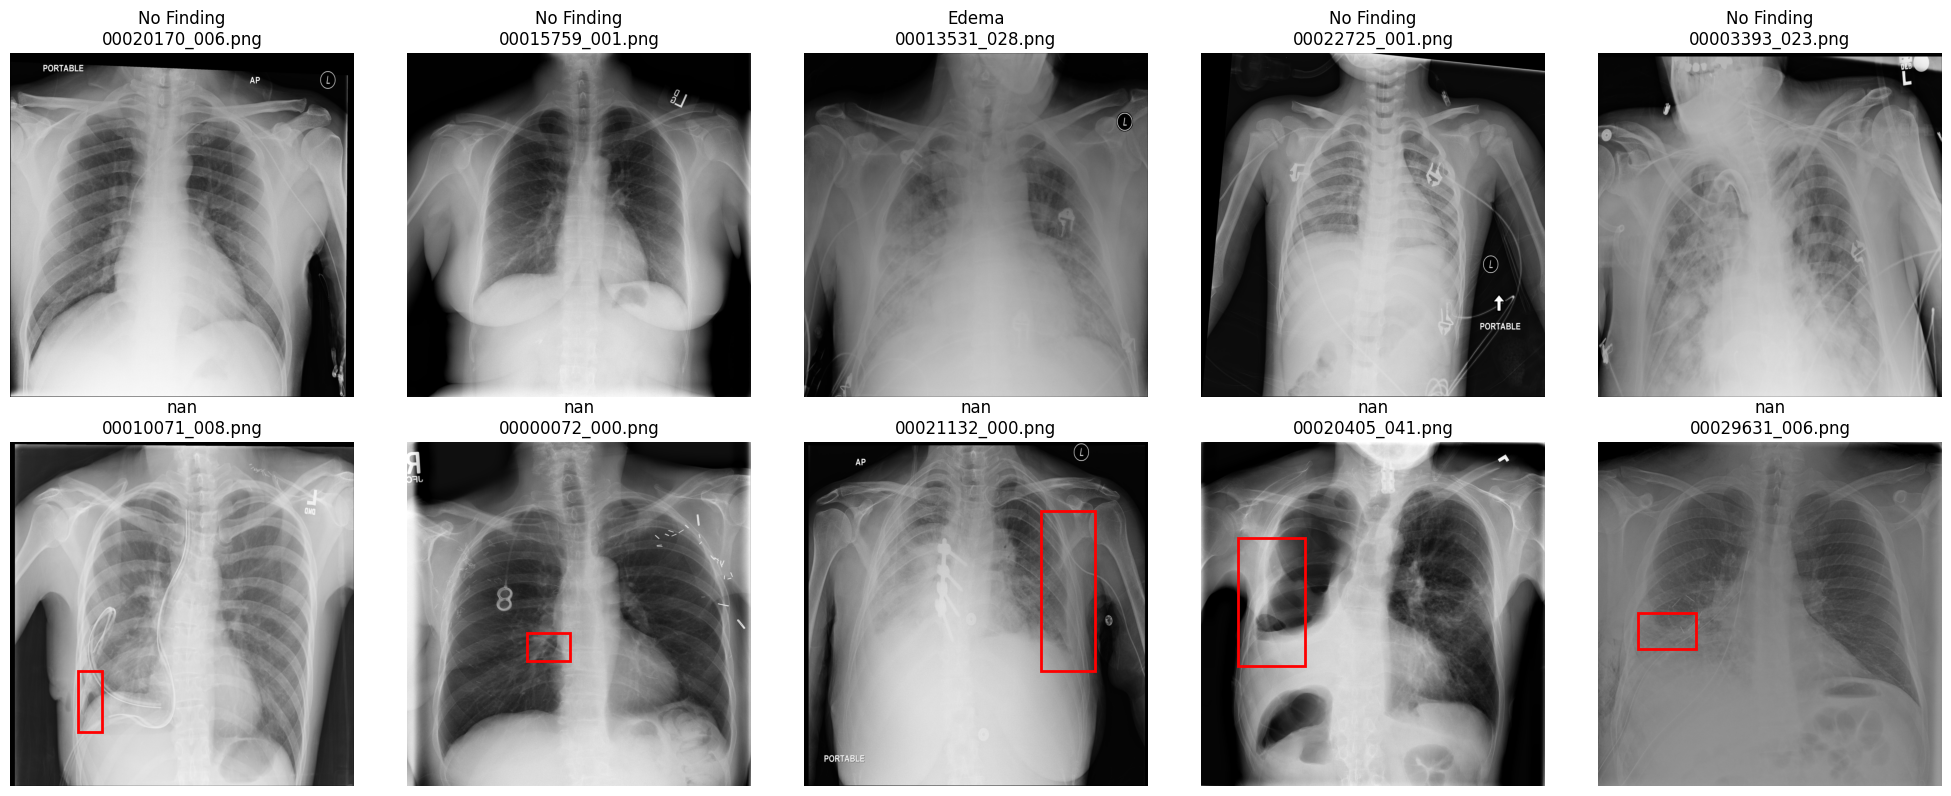

In [12]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

data = pd.read_csv('Data_Entry_2017_v2020.csv') 
bbox_data = pd.read_csv('BBox_List_2017.csv') 

image_dir = 'C:/Users/Aditya/Desktop/Spring 23/CMSE 890 Applied Machine Learning/Project/images'

random_images_without_bbox = data[~data['Image Index'].isin(bbox_data['Image Index'])].sample(n=5)

random_images_with_bbox = bbox_data.sample(n=5)

random_images = pd.concat([random_images_without_bbox, random_images_with_bbox], ignore_index=True)

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for (idx, row), ax in zip(random_images.iterrows(), axes.ravel()):
    image_path = os.path.join(image_dir, row['Image Index'])
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    label = row['Finding Labels']

    bbox_row = bbox_data[bbox_data['Image Index'] == row['Image Index']]

    if not bbox_row.empty:
        x = bbox_row.iloc[0]['Bbox [x']
        y = bbox_row.iloc[0]['y']
        w = bbox_row.iloc[0]['w']
        h = bbox_row.iloc[0]['h]']
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    ax.imshow(img)
    ax.set_title(f'{label}\n{row["Image Index"]}')
    ax.axis('off')

plt.tight_layout()
plt.savefig('sampleimages.png', bbox_inches='tight')
plt.show()
